In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head(13)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


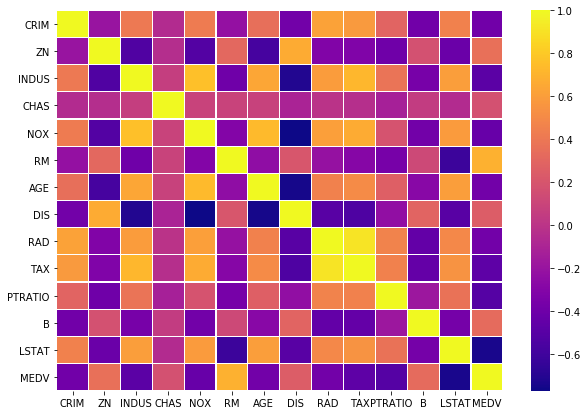

In [162]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [10, 7]
import seaborn as sns
sns.heatmap(data.corr(), cmap='plasma', linewidth=0.2)
plt.show()

Далее попробуем найти зависимость между имеющимися данными для расчета стоимости жилья, в учебных целях
я предпочел проверить возможно ли это сделать представив таблицу в виде системы линейных уравнений, заранее отбрасываю
все дискретные параметры, а так же параметры на мой взгляд, не сильно влияющие на ответ

In [16]:
import numpy as np
x = data.drop(['ZN', 'INDUS', 'CHAS', 'TAX', 'NOX', 'RAD', 'DIS', 'MEDV'], axis=1)

Разбиваем таблицу на участки с равным количеством строк и столбцов
и затем находим коэфицеенты линейного уравнения

In [164]:
array = []
for i in range(0, len(data), 6):
    
    x1 = x.loc[i:i+5, :'LSTAT']
    y1 = data.loc[i:i+5, 'MEDV']
    if i == 504:
        break
    else:  
        z1 = np.linalg.solve(x1, y1)
        array.append(z1)

ar = np.array(array)
ar.shape
ar1 = np.transpose(ar)

Полученные значения по всем 84 матрицам отображаем на графике

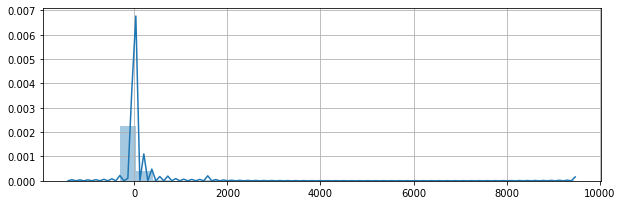

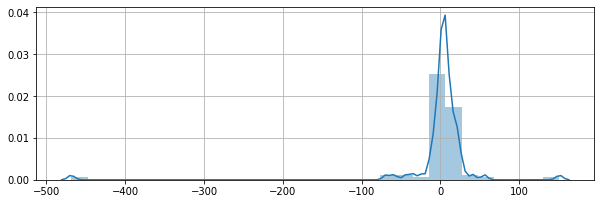

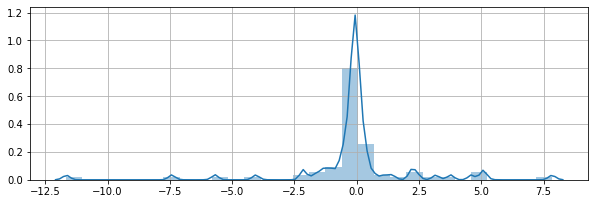

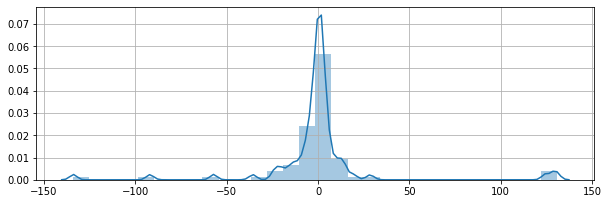

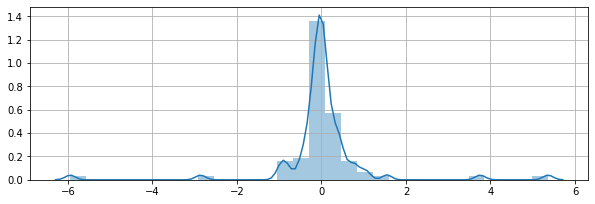

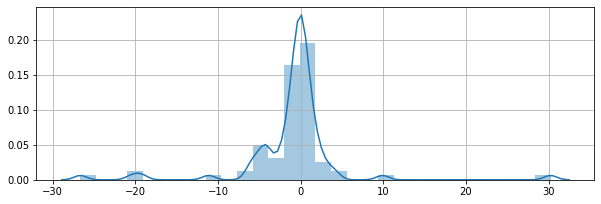

In [27]:
for i in range(len(ar1)):
    plt.subplot(2, 1, 2)
    sns.distplot(ar1[i], 30)
    plt.grid()
    plt.show()

In [19]:
from scipy import stats

In [20]:
trimmed_means = []
for _ in range(len(ar1)):
    
    trimmed_means.append(round(stats.trim_mean(ar1[_], 0.1), 5))
trimmed_means
# Усредненные коэфицеенты линейного уравнения для таблицы с отобранными признакми

[9.62941, 5.00192, -0.06188, -0.38035, 0.01262, -0.63927]

In [21]:
table = pd.DataFrame(ar, columns=['CRIM', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'])
table.describe()

,CRIM,RM,AGE,PTRATIO,B,LSTAT
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,137.411994,-0.172680,-0.073816,0.508158,0.026243,-1.024731
std,1059.689057,56.774286,2.304795,32.105115,1.099575,5.949173
min,-1399.584627,-468.300703,-11.661674,-133.898046,-5.942666,-26.651779
25%,-8.195893,-0.838159,-0.314285,-3.708083,-0.167773,-1.892567
50%,0.080098,4.651029,-0.071189,0.556522,-0.005278,-0.248298
75%,17.640644,11.715999,0.125524,2.874675,0.189195,0.421138
max,9448.578191,150.760336,7.847290,130.961706,5.365044,30.229874


In [23]:
prices = []
for i in range(len(x)):
    prices.append(np.dot(x.loc[i, :], trimmed_means))


In [164]:
x = data.drop(['ZN', 'INDUS', 'CHAS', 'TAX'], axis=1)
x_learn = x.loc[:, :'LSTAT']
y_learn = data.loc[:, 'MEDV']

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x_learn, y_learn, test_size=0.3)
model = RandomForestClassifier()
# model.fit(x_train, y_train)

Предсказанные значения стоимости жилья 'MEDV', без коэфиццента масштаба

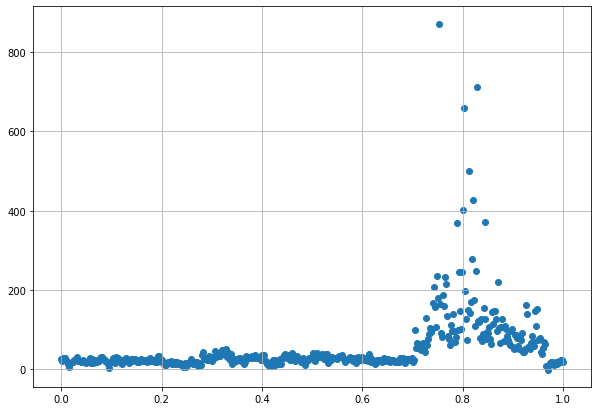

In [28]:
dist = np.linspace(0, 1, len(x))
dist1 = np.linspace(0, 100, len(x))
plt.scatter(dist, prices)
plt.grid()
plt.show()

Фактический график рассеяния точек стоимости жилья, отличается значительно.
Предполагаю, что для того чтобы предсазывать значения методом решения линейных уравнений значения должны иметь
одинаковое распределение

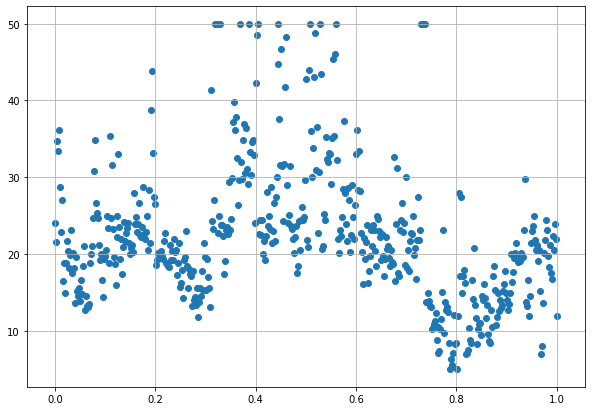

In [30]:
plt.scatter(dist, data.MEDV)
plt.grid()
plt.show()

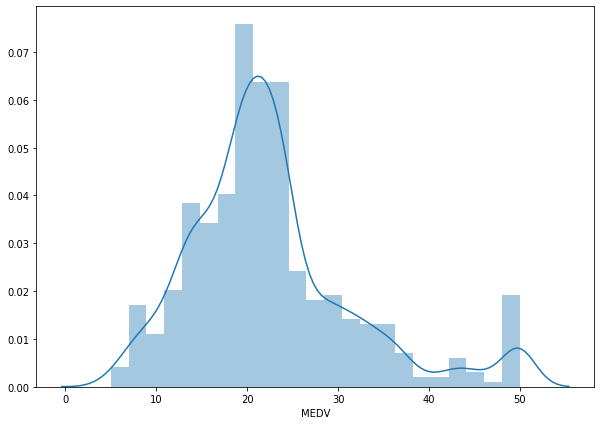

In [31]:
sns.distplot(data.MEDV)
plt.show()

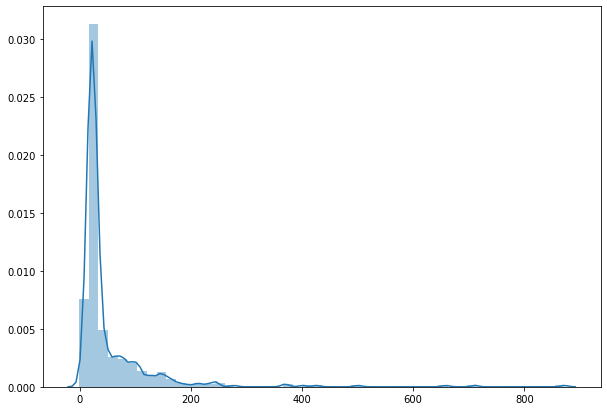

In [32]:
sns.distplot(prices)
plt.show()

Распределение фактических и предсказанных значений имеют даже разный вид

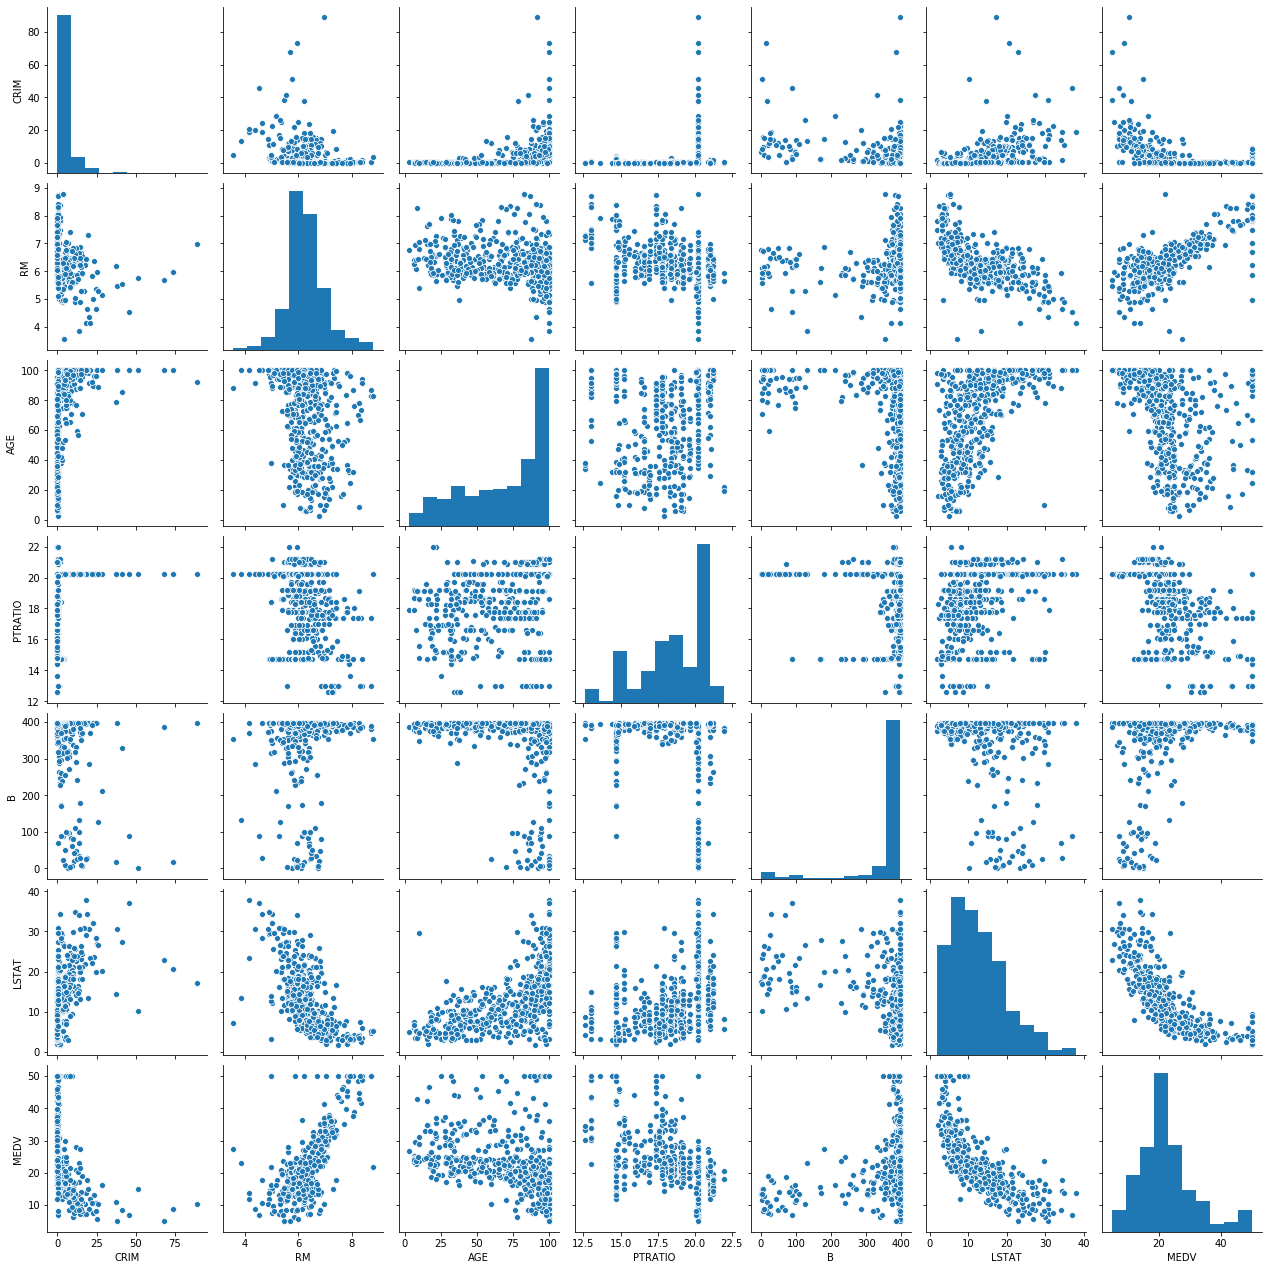

In [35]:
sns.pairplot(data.drop(['ZN', 'INDUS', 'CHAS', 'TAX', 'NOX', 'RAD', 'DIS'], axis=1))
plt.show()

Напоследок попробуем предсказать стоимость квартиры, отдельно по значениям "RM" и "LSTAT"

In [79]:
data_outliers = data.loc[(data.RM > 4) & (data.RM < 8.5) & (data.MEDV < 50)]


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rm = np.array(data_outliers.RM).reshape(-1, 1)
medv = np.array(data_outliers.MEDV).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(rm, medv, test_size=0.3)

In [145]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

С помощью полученной линейно зависимости можно предсказывать, чем больше комнат, тем дороже квартиры - удобно

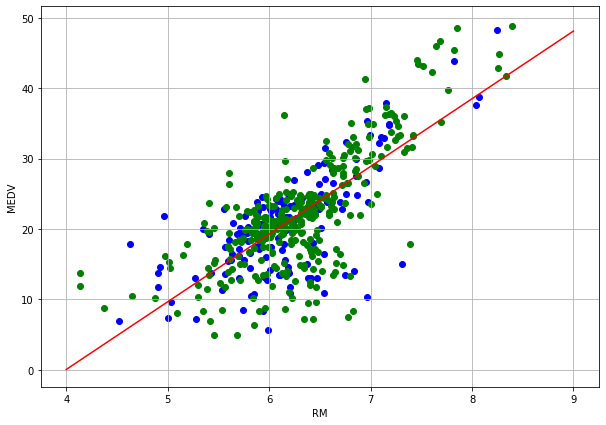

In [151]:
linsp = np.linspace(4, 9, len(x_train))
plt.scatter(x_test, y_test, c='b')
plt.scatter(x_train, y_train, c='g')
plt.plot(linsp, ((model.coef_[0])*linsp + (model.intercept_[0])), c='r')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid()
plt.show()

In [152]:
from sklearn.neighbors import KNeighborsRegressor
lstat = np.array(data_outliers.LSTAT).reshape(-1, 1)
x1_train, x1_test, y1_train, y1_test = train_test_split(lstat, medv, test_size=0.3)

In [153]:
knn = KNeighborsRegressor(n_neighbors=7, weights='uniform')

In [154]:
model1.fit(x1_train, y1_train)

KNeighborsRegressor()

In [155]:
J = knn.fit(x1_train, y1_train)

Моделью л-ближаших соседей можно так же удобно предсказывать стоимость жилья - чем меньше % необеспеченных семей, тем дороже
квартиры

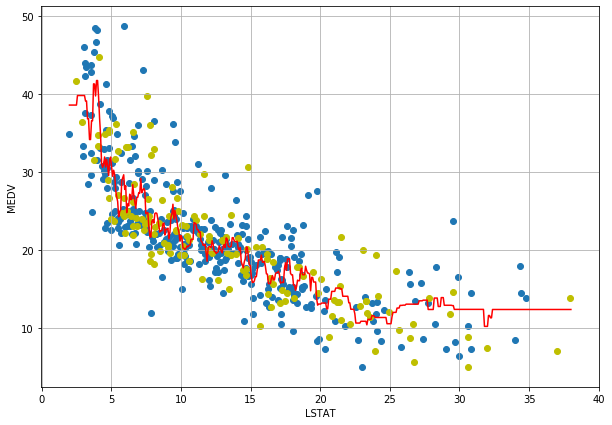

In [161]:
x_ = np.linspace(2, 38, 500)
l = np.array(x_).reshape(-1, 1)
plt.plot(l, J.predict(l), c='r')
plt.scatter(x1_train, y1_train)
plt.scatter(x1_test, y1_test, c='y')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.grid()
plt.show()